In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from scipy import stats

sns.set_style("whitegrid")
%config IPCompleter.greedy=True

In [2]:
dataset_load = []
labels = ['years', 'region', 'total', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten_more', 'unk']
for x in range(2002, 2017):
    dataset_load.append(pd.read_csv("regions_pl_uro_{}_00_2p.csv".format(x), index_col=0, usecols=list(range(1,14))))

dataset = pd.concat(dataset_load, keys=list(range(2002, 2018)))

#create multiindex
index_years = dataset.index.levels[0]
index_regions = dataset.index.levels[1].str.strip()
dataset.index = pd.MultiIndex.from_product([index_years, index_regions], names=['years', 'region'])

#using index as columns
dataset.reset_index(level=[0,1], inplace=True)
# dataset.columns = labels
dataset

,years,region,total,1,2,3,4,5,6,7,8,9,10 i dalsze,nieustalona
0,2002,DOLNOŚLĄSKIE,24588.0,12684.0,7543.0,2620.0,904.0,418.0,198,113,48,26,34,-
1,2002,KUJAWSKO-POMORSKIE,20238.0,10074.0,6132.0,2253.0,887.0,453.0,196,108,65,28,40,2
2,2002,LUBELSKIE,20908.0,9548.0,6437.0,2691.0,1134.0,512.0,275,148,81,42,37,3
3,2002,LUBUSKIE,9486.0,4730.0,2926.0,1016.0,427.0,193.0,85,43,37,14,15,-
4,2002,ŁÓDZKIE,22258.0,11419.0,7113.0,2325.0,787.0,316.0,160,59,34,16,25,4
5,2002,MAŁOPOLSKIE,32451.0,14710.0,10254.0,4194.0,1723.0,773.0,360,189,121,52,72,3
6,2002,MAZOWIECKIE,46627.0,23028.0,14821.0,5201.0,1979.0,848.0,362,186,90,67,44,1
7,2002,OPOLSKIE,8506.0,3938.0,2704.0,1043.0,459.0,178.0,70,50,29,13,22,-
8,2002,PODKARPACKIE,21414.0,9488.0,6592.0,2856.0,1239.0,616.0,297,151,82,40,53,-
9,2002,PODLASKIE,11318.0,5032.0,3526.0,1528.0,646.0,290.0,141,64,35,26,29,1


## Kids

In [3]:
def one_kid_in_column(column):
    one_kid = {}
    for index, row in dataset.iterrows():
        if row[column] in one_kid:
            one_kid[row[column]] += int(row['1'])
        else:
            one_kid[row[column]] = int(row['1'])
    return one_kid


def more_kids_in_column(column):
    more_kids = {}
    for index, row in dataset.iterrows():
        sum_kids = 0
        for kids in range(4,14):
            if row[kids] != '-':
                sum_kids += int(row[kids])
        if row[column] in more_kids:
            more_kids[row[column]] += sum_kids
        else:
            more_kids[row[column]] = sum_kids
    return more_kids

def one_or_more_to_arr(one_kid, more_kids):
    one_kid_arr = []
    more_kids_arr = []
    for one, more in zip(one_kid.items(), more_kids.items()):
        one_kid_arr.append(int(one[1]))
        more_kids_arr.append(int(more[1]))
    return one_kid_arr, more_kids_arr

## Years

In [4]:
one_kid = one_kid_in_column('years')
more_kids = more_kids_in_column('years')
one_kid_arr, more_kids_arr = one_or_more_to_arr(one_kid, more_kids)

pearson_year = (stats.pearsonr(one_kid_arr, more_kids_arr))
print(pearson_year)
# sns.barplot(x=['one', 'more'], y=pearson_year)
        
for one, more in zip(one_kid.items(), more_kids.items()):
    print('Y:%s One:%s More:%s Diff:%s' % (one[0], one[1], more[1], one[1]-more[1]))

(0.5093288301540866, 0.05247116116864422)
Y:2002 One:172892 More:182634 Diff:-9742
Y:2003 One:177167 More:175618 Diff:1549
Y:2004 One:181433 More:176451 Diff:4982
Y:2005 One:187213 More:178882 Diff:8331
Y:2006 One:192670 More:183365 Diff:9305
Y:2007 One:198066 More:191647 Diff:6419
Y:2008 One:211419 More:205018 Diff:6401
Y:2009 One:213513 More:205824 Diff:7689
Y:2010 One:207914 More:207116 Diff:798
Y:2011 One:191788 More:198281 Diff:-6493
Y:2012 One:188910 More:198948 Diff:-10038
Y:2013 One:180282 More:190680 Diff:-10398
Y:2014 One:178603 More:197898 Diff:-19295
Y:2015 One:173669 More:195639 Diff:-21970
Y:2016 One:175888 More:206369 Diff:-30481


## Regions

In [5]:
# regions = {}
one_region = one_kid_in_column('region')
more_region = more_kids_in_column('region')
one_region_arr, more_region_arr = one_or_more_to_arr(one_region, more_region)
# for index, row in dataset.iterrows():
#     if row['region'] in regions:
#         regions[row['region']] += int(row['total'])
#     else:
#         regions[row['region']] = int(row['total'])
# regions
pearson_region = (stats.pearsonr(one_region_arr, more_region_arr))
print(pearson_region)
# sns.barplot(x=['one', 'more'], y=pearson_region)
        
for one, more in zip(one_region.items(), more_region.items()):
    print('Y:%s One:%s More:%s Diff:%s' % (one[0], one[1], more[1], one[1]-more[1]))

(0.9917897013205913, 6.598945920659162e-14)
Y:DOLNOŚLĄSKIE One:208972 More:196709 Diff:12263
Y:KUJAWSKO-POMORSKIE One:156093 More:158337 Diff:-2244
Y:LUBELSKIE One:153418 More:165336 Diff:-11918
Y:LUBUSKIE One:76120 More:77389 Diff:-1269
Y:ŁÓDZKIE One:181939 More:170639 Diff:11300
Y:MAŁOPOLSKIE One:243078 More:275741 Diff:-32663
Y:MAZOWIECKIE One:412872 More:412793 Diff:79
Y:OPOLSKIE One:63692 More:66073 Diff:-2381
Y:PODKARPACKIE One:145671 More:168533 Diff:-22862
Y:PODLASKIE One:79810 More:89044 Diff:-9234
Y:POMORSKIE One:178687 More:194297 Diff:-15610
Y:ŚLĄSKIE One:332959 More:317403 Diff:15556
Y:ŚWIĘTOKRZYSKIE One:87257 More:86578 Diff:679
Y:WARMIŃSKO-MAZURSKIE One:107610 More:114472 Diff:-6862
Y:WIELKOPOLSKIE One:279811 More:279477 Diff:334
Y:ZACHODNIOPOMORSKIE One:123438 More:121549 Diff:1889


In [7]:
kids_years = {}
for row in dataset.itertuples():
    for column in row:
        kids_years[row.years][row.one] = column.one
    if row.years in kids_years:
        kids_years[row.years] += int(row.one)
    else:
        kids_years[row.years] = int(row.one)
kids_years

AttributeError: 'int' object has no attribute 'one'

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

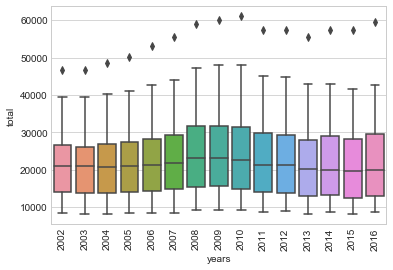

In [19]:
sns.boxplot(x=dataset['years'], y=dataset['total'])
plt.xticks(rotation=90)